# Problem Statement:
A bank wants to predict whether a customer will subscribe to a term deposit after a marketing call campaign.    
This is a Supervised Machine Learning – Classification Problem  
Because We have labeled data    
Target variable is categorical (Yes/No)

# DataSet Description
customer_age : Age of the customer

job_type : Type of occupation or job category of the customer

marital_status : Marital status of the customer (married, single, divorced)

education_level : Highest education qualification of the customer

credit_default : Whether the customer has credit in default

has_housing_loan : Indicates if the customer has a housing loan

has_personal_loan : Indicates if the customer has a personal loan

contact_type : Communication method used to contact the customer (cellular or telephone)

last_contact_month : Month when the customer was last contacted

last_contact_day : Day of the week when the last contact occurred

call_duration_sec : Duration of the last marketing call in seconds

campaign_contacts : Number of contacts performed during the current marketing campaign

days_since_last_contact : Number of days since the customer was last contacted (999 means never contacted before)

previous_contacts : Number of contacts performed before the current campaign

previous_campaign_outcome : Result of the previous marketing campaign (success, failure, nonexistent)

employment_variation_rate : Quarterly employment variation rate (economic indicator)

consumer_price_index : Consumer price index representing inflation level

consumer_confidence_index : Consumer confidence index reflecting economic sentiment

euribor_3m_rate : Euribor 3-month interest rate indicator

number_of_employees : Total number of employees in the economy (economic indicator)

subscription : Target variable indicating whether the customer subscribed to a term deposit (yes/no)

# Import Required Libraries

In [141]:
# Basic libraries for data handling
import pandas as pd         # dataset handling
import numpy as np          # numerical operations

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# for balancing the imbalance class
from imblearn.over_sampling import SMOTE


#### Load the dataset

In [142]:
df = pd.read_csv('bank-additional-full.csv')

In [143]:
df.rename(columns={
    "age": "customer_age",
    "job": "job_type",
    "marital": "marital_status",
    "education": "education_level",
    "default": "credit_default",
    "housing": "has_housing_loan",
    "loan": "has_personal_loan",
    "contact": "contact_type",
    "month": "last_contact_month",
    "day_of_week": "last_contact_day",
    "duration": "call_duration_sec",
    "campaign": "campaign_contacts",
    "pdays": "days_since_last_contact",
    "previous": "previous_contacts",
    "poutcome": "previous_campaign_outcome",
    "emp.var.rate": "employment_variation_rate",
    "cons.price.idx": "consumer_price_index",
    "cons.conf.idx": "consumer_confidence_index",
    "euribor3m": "euribor_3m_rate",
    "nr.employed": "number_of_employees",
    "y": "subscription"
}, inplace=True)

In [144]:
# Check column names
df.columns

Index(['customer_age', 'job_type', 'marital_status', 'education_level',
       'credit_default', 'has_housing_loan', 'has_personal_loan',
       'contact_type', 'last_contact_month', 'last_contact_day',
       'call_duration_sec', 'campaign_contacts', 'days_since_last_contact',
       'previous_contacts', 'previous_campaign_outcome',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor_3m_rate', 'number_of_employees',
       'subscription'],
      dtype='object')

In [145]:
# check number of rows and columns
df.shape

(41188, 21)

The dataset contains around 41,000+ rows and 21 columns.

In [146]:
# Show first 5 rows
df.head(5)

,customer_age,job_type,marital_status,education_level,credit_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day,...,campaign_contacts,days_since_last_contact,previous_contacts,previous_campaign_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3m_rate,number_of_employees,subscription
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We can see columns like customer_age, job_type, marital_status, education_level, and subscription (target).
The dataset contains both numerical and categorical features.
The target variable contains binary values (yes/no), making it suitable for classification.

In [147]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_age               41188 non-null  int64  
 1   job_type                   41188 non-null  object 
 2   marital_status             41188 non-null  object 
 3   education_level            41188 non-null  object 
 4   credit_default             41188 non-null  object 
 5   has_housing_loan           41188 non-null  object 
 6   has_personal_loan          41188 non-null  object 
 7   contact_type               41188 non-null  object 
 8   last_contact_month         41188 non-null  object 
 9   last_contact_day           41188 non-null  object 
 10  call_duration_sec          41188 non-null  int64  
 11  campaign_contacts          41188 non-null  int64  
 12  days_since_last_contact    41188 non-null  int64  
 13  previous_contacts          41188 non-null  int

Some columns are numerical (int/float) while others are categorical (object).   
No immediate missing values are visible, but we must verify further.    
Target variable is object type and must be encoded later.   
Several macroeconomic features are continuous numeric values.   

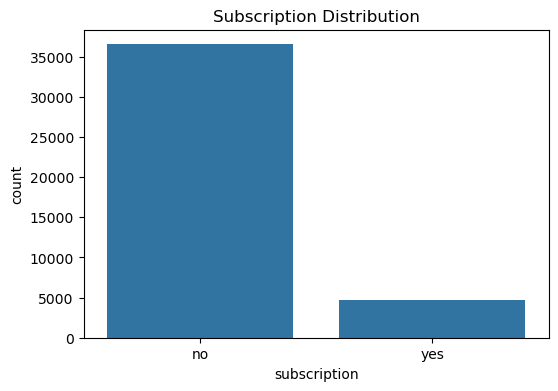

In [148]:
plt.figure(figsize=(6,4))
sns.countplot(x='subscription', data=df)
plt.title("Subscription Distribution")
plt.show()

The graph clearly shows heavy class imbalance.
Most customers did not subscribe, while a smaller portion subscribed.
This imbalance may cause model bias toward majority class.
SMOTE will be required later to balance classes.

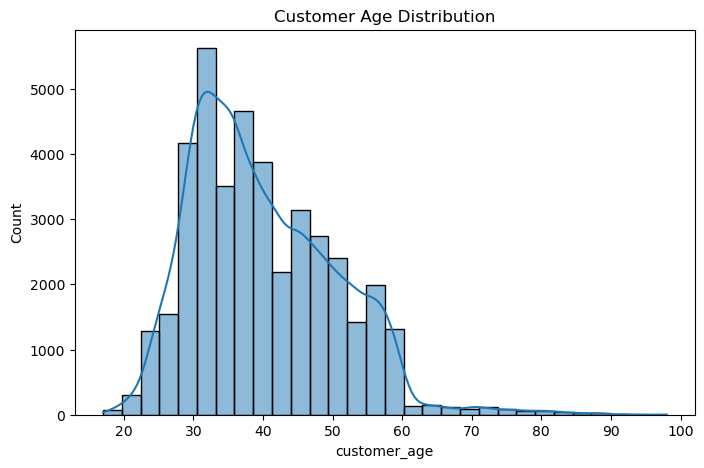

In [149]:
plt.figure(figsize=(8,5))
sns.histplot(df['customer_age'], bins=30, kde=True)
plt.title("Customer Age Distribution")
plt.show()

Most customers are between 30 and 50 years old.
The distribution is slightly right-skewed.
Few customers are above 70 years old.

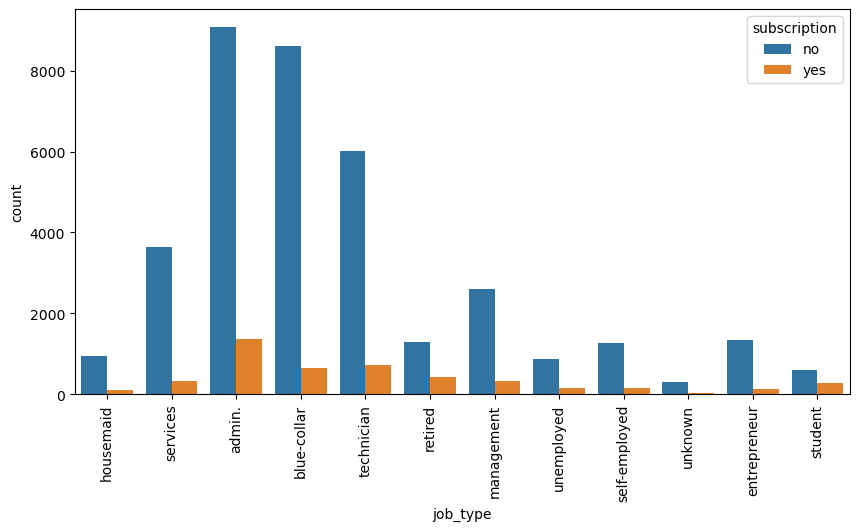

In [150]:
# Job Type & Subscription
plt.figure(figsize=(10,5))
sns.countplot(x='job_type', hue='subscription', data=df)
plt.xticks(rotation=90)
plt.show()

# DATA CLEANING

Remove Duplicates

In [151]:
df.duplicated().sum()

np.int64(15)

In [152]:
df = df.drop_duplicates()

In [153]:
# Check Null Values
df.isnull().sum()

customer_age                 0
job_type                     0
marital_status               0
education_level              0
credit_default               0
has_housing_loan             0
has_personal_loan            0
contact_type                 0
last_contact_month           0
last_contact_day             0
call_duration_sec            0
campaign_contacts            0
days_since_last_contact      0
previous_contacts            0
previous_campaign_outcome    0
employment_variation_rate    0
consumer_price_index         0
consumer_confidence_index    0
euribor_3m_rate              0
number_of_employees          0
subscription                 0
dtype: int64

* no missing values found

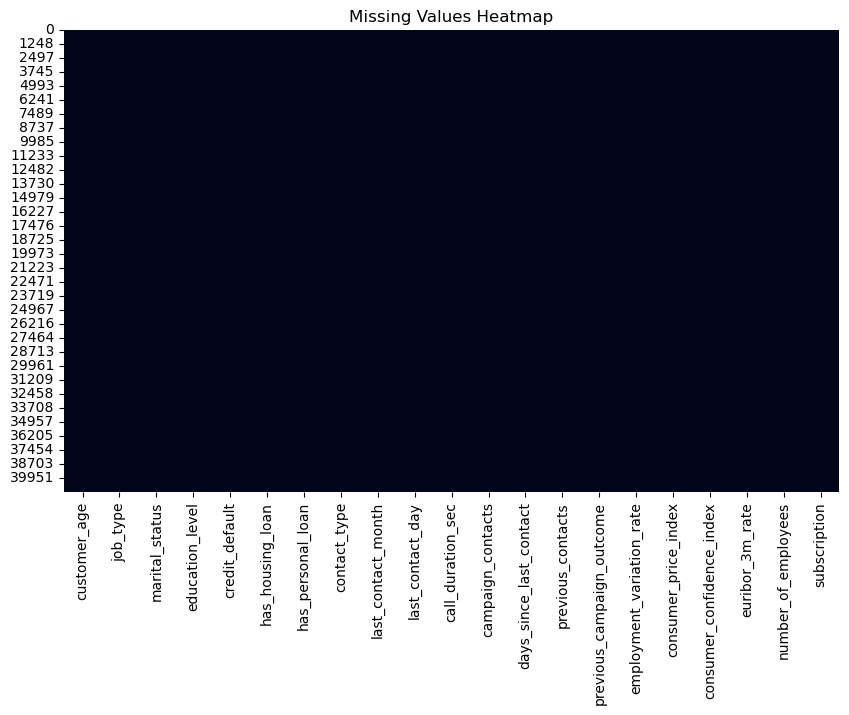

In [154]:
# Visualize Missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [155]:
# Check unknown values in each column
for col in df.columns:
    if df[col].dtype == "object":
        print(col, ":", (df[col] == "unknown").sum())

job_type : 330
marital_status : 80
education_level : 1730
credit_default : 8596
has_housing_loan : 990
has_personal_loan : 990
contact_type : 0
last_contact_month : 0
last_contact_day : 0
previous_campaign_outcome : 0
subscription : 0


In [156]:
# Replace 'unknown' with NaN first
df.replace("unknown", np.nan, inplace=True)

# Fill categorical missing values with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\sahun\AppData\Local\Temp\ipykernel_11944\3245155747.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [157]:
# Recheck unknown values in each column
for col in df.columns:
    if df[col].dtype == "object":
        print(col, ":", (df[col] == "unknown").sum())

job_type : 0
marital_status : 0
education_level : 0
credit_default : 0
has_housing_loan : 0
has_personal_loan : 0
contact_type : 0
last_contact_month : 0
last_contact_day : 0
previous_campaign_outcome : 0
subscription : 0


All "unknown" values are now replaced with the most frequent category in each column.
This ensures no data loss while maintaining dataset size.
Replacing with mode is suitable for categorical features.

#### Remove Duplicates

In [158]:
# Check duplicate
df.duplicated().sum()

np.int64(2)

In [159]:
# Remove duplicate 
df = df.drop_duplicates()

In [160]:
# Recheck duplicate
df.duplicated().sum()

np.int64(0)

#### Datatype conversion

In [161]:
# Check data type
df.dtypes

customer_age                   int64
job_type                      object
marital_status                object
education_level               object
credit_default                object
has_housing_loan              object
has_personal_loan             object
contact_type                  object
last_contact_month            object
last_contact_day              object
call_duration_sec              int64
campaign_contacts              int64
days_since_last_contact        int64
previous_contacts              int64
previous_campaign_outcome     object
employment_variation_rate    float64
consumer_price_index         float64
consumer_confidence_index    float64
euribor_3m_rate              float64
number_of_employees          float64
subscription                  object
dtype: object

In [162]:
# Convert target variable into numeric
df['subscription'] = df['subscription'].map({'yes': 1, 'no': 0})

In [163]:
# Recheck data type
df.dtypes

customer_age                   int64
job_type                      object
marital_status                object
education_level               object
credit_default                object
has_housing_loan              object
has_personal_loan             object
contact_type                  object
last_contact_month            object
last_contact_day              object
call_duration_sec              int64
campaign_contacts              int64
days_since_last_contact        int64
previous_contacts              int64
previous_campaign_outcome     object
employment_variation_rate    float64
consumer_price_index         float64
consumer_confidence_index    float64
euribor_3m_rate              float64
number_of_employees          float64
subscription                   int64
dtype: object

In [164]:
# Separate Numerical & Categorical Variables
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [165]:
num_cols

Index(['customer_age', 'call_duration_sec', 'campaign_contacts',
       'days_since_last_contact', 'previous_contacts',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor_3m_rate', 'number_of_employees',
       'subscription'],
      dtype='object')

In [166]:
cat_cols

Index(['job_type', 'marital_status', 'education_level', 'credit_default',
       'has_housing_loan', 'has_personal_loan', 'contact_type',
       'last_contact_month', 'last_contact_day', 'previous_campaign_outcome'],
      dtype='object')

# Outliers

In [167]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

numerical_cols

Index(['customer_age', 'call_duration_sec', 'campaign_contacts',
       'days_since_last_contact', 'previous_contacts',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor_3m_rate', 'number_of_employees',
       'subscription'],
      dtype='object')

In [168]:
# Calculate number of columns
num_cols = len(numerical_cols)
cols = 3 
num_cols

11

In [169]:
# Remove columns with only one unique value
numerical_cols = [col for col in numerical_cols if df[col].nunique() > 1]


# if don't do the error will be - List of boxplot statistics and `positions` values must have same the length Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

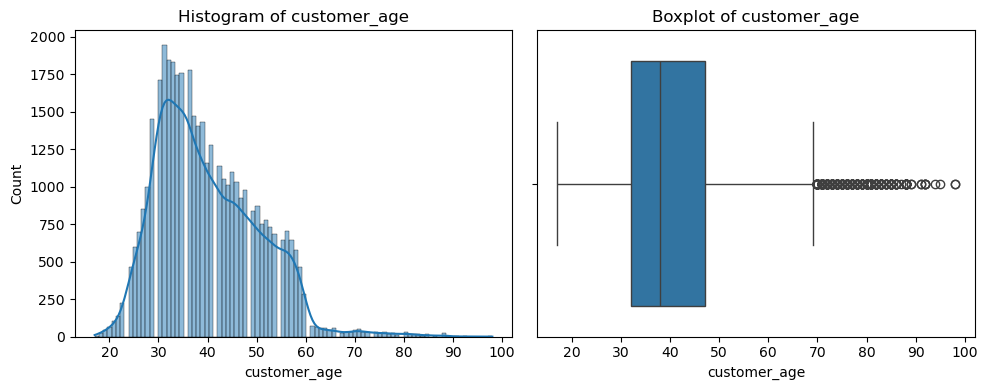

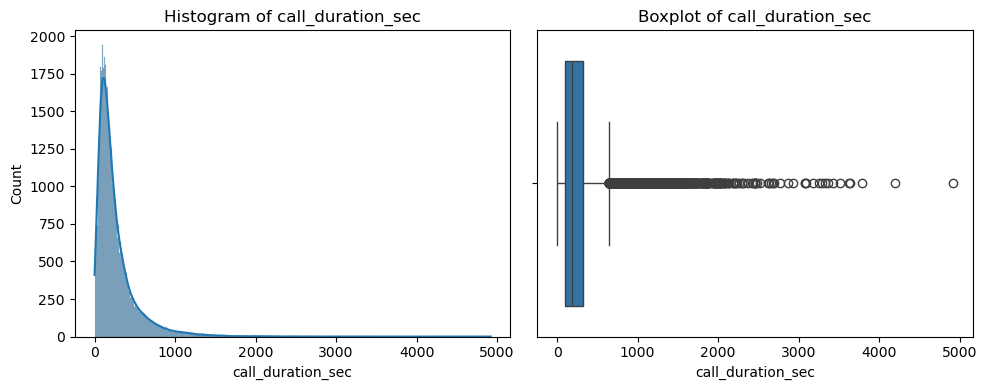

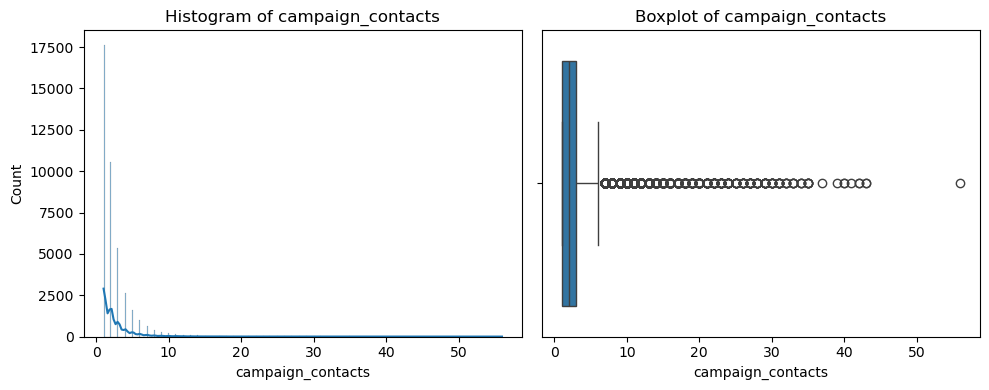

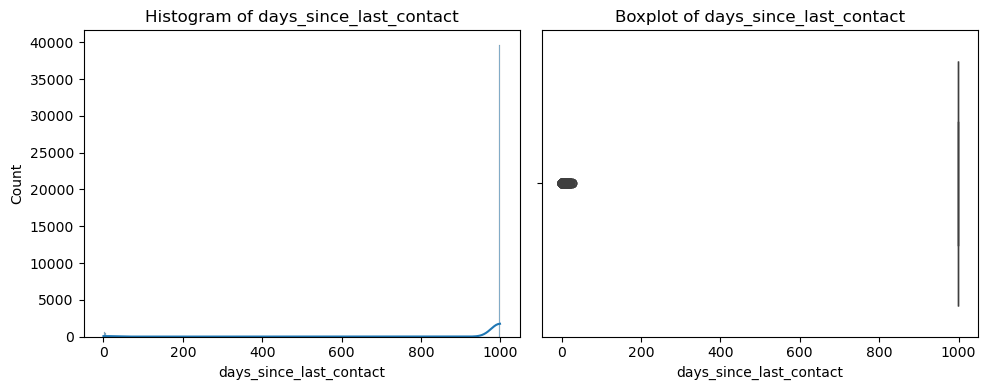

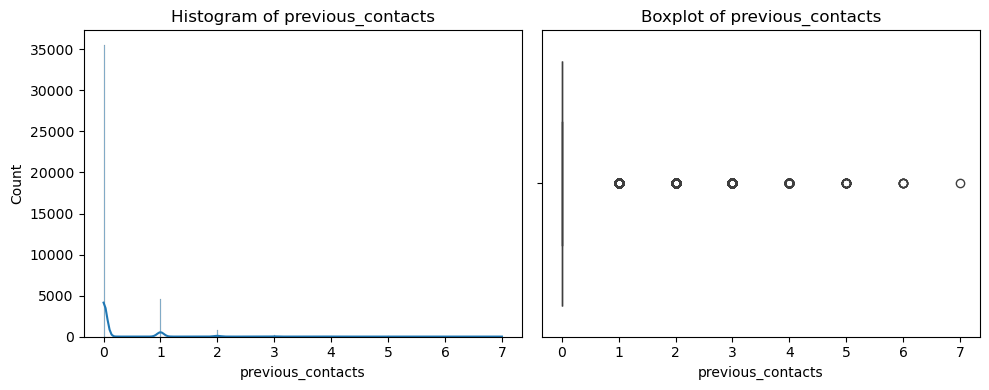

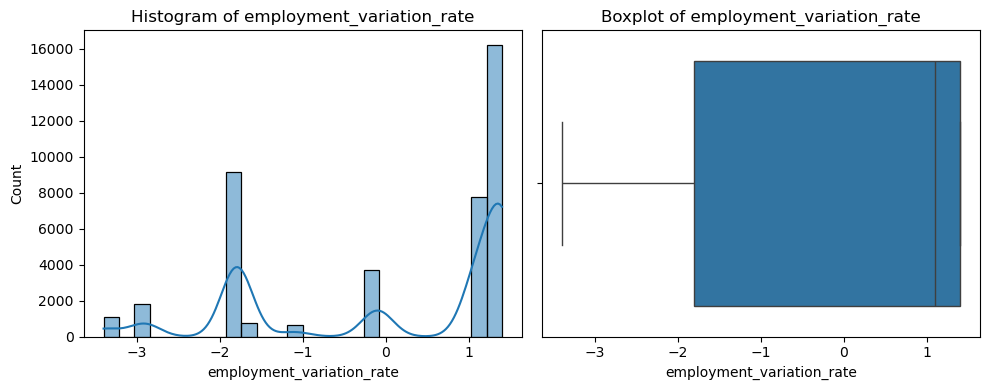

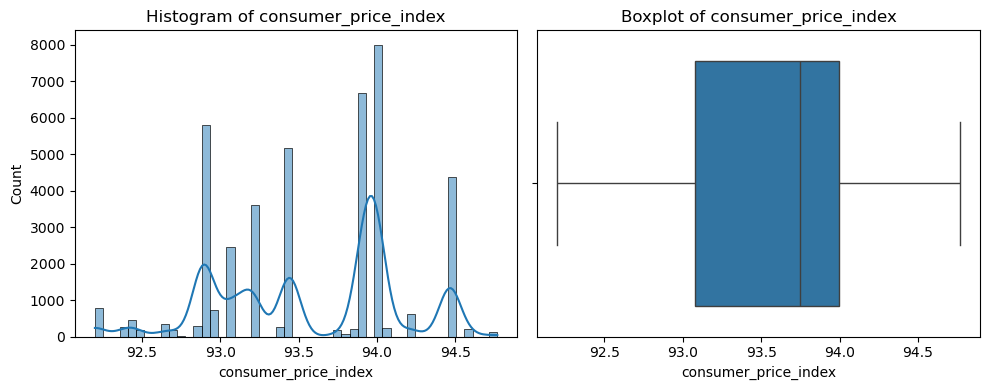

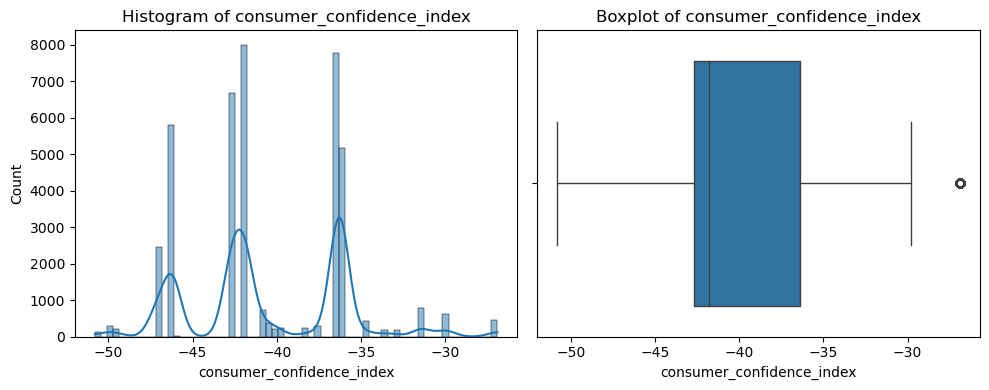

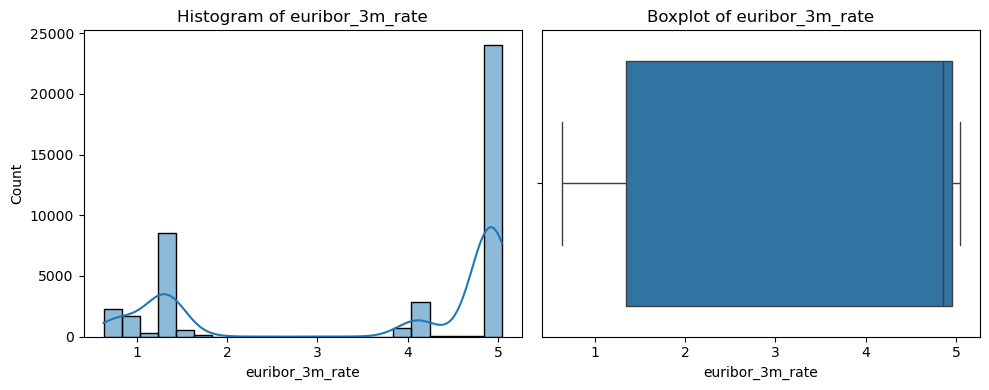

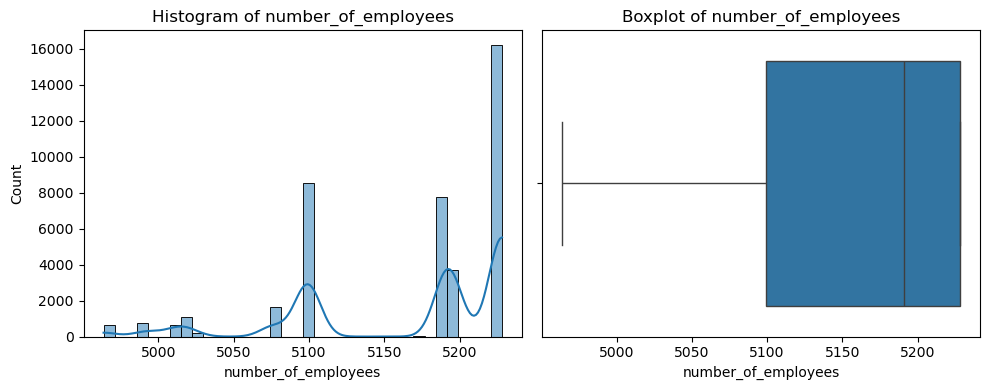

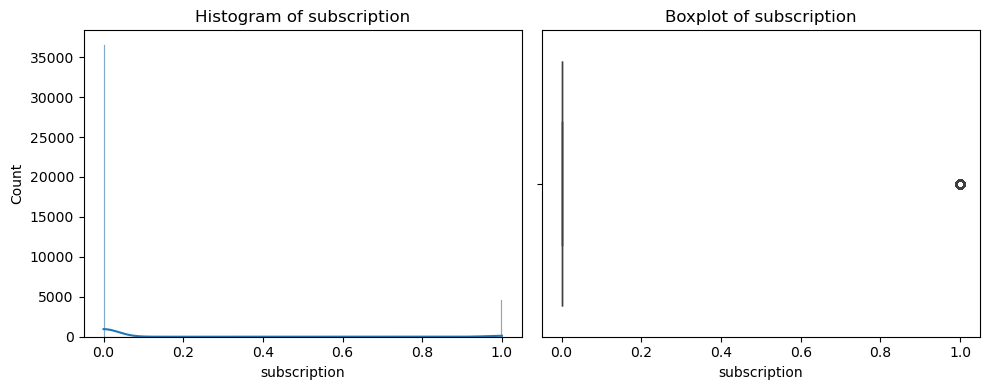

In [170]:
for col in numerical_cols:
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()

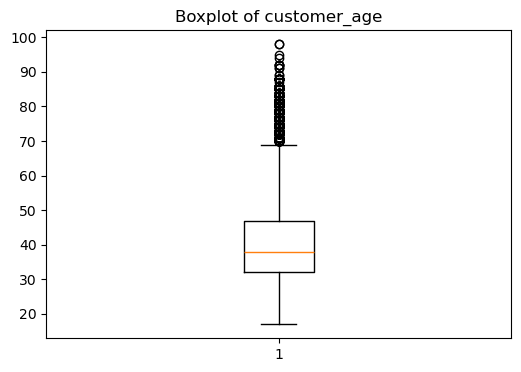

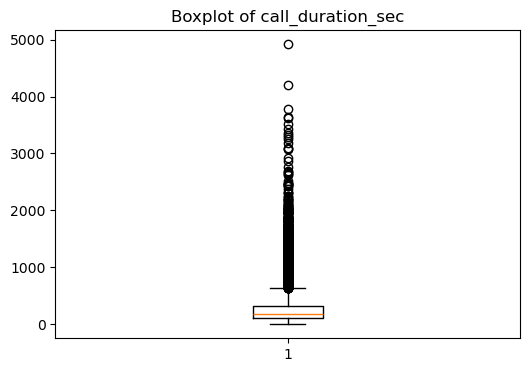

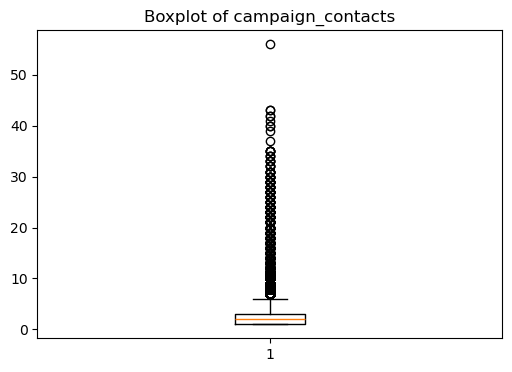

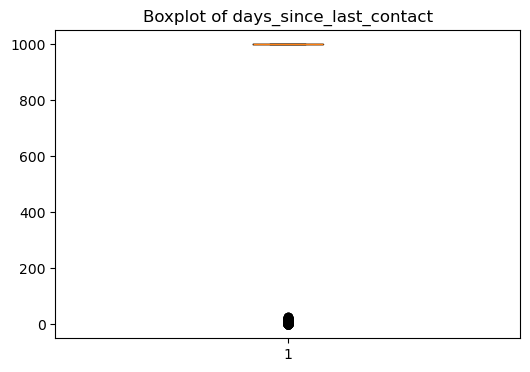

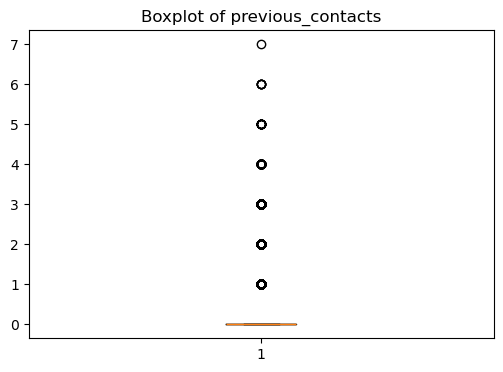

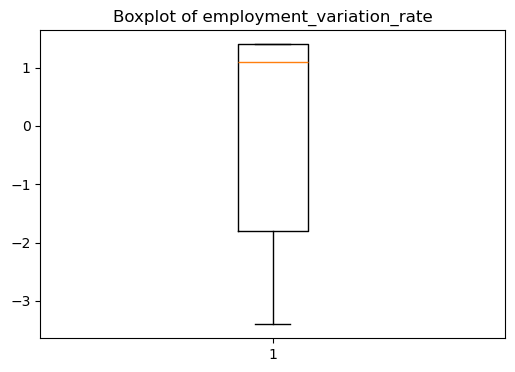

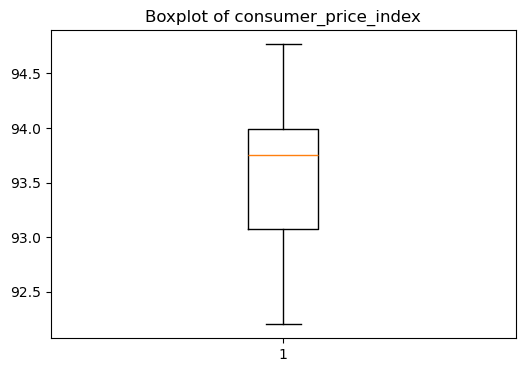

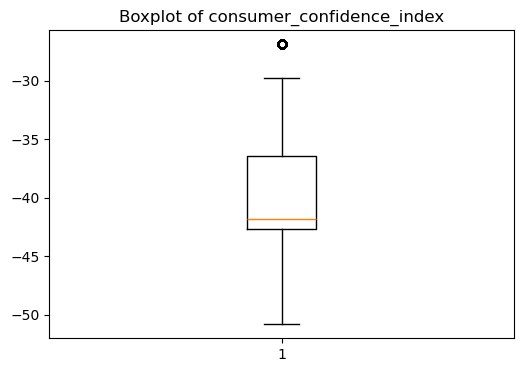

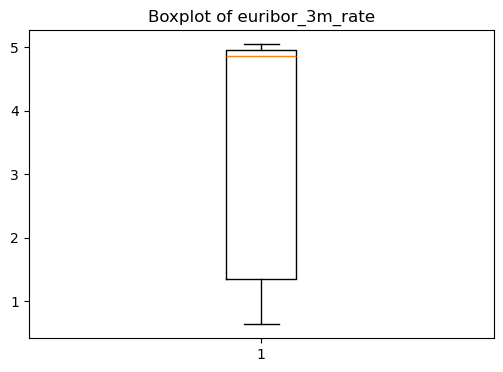

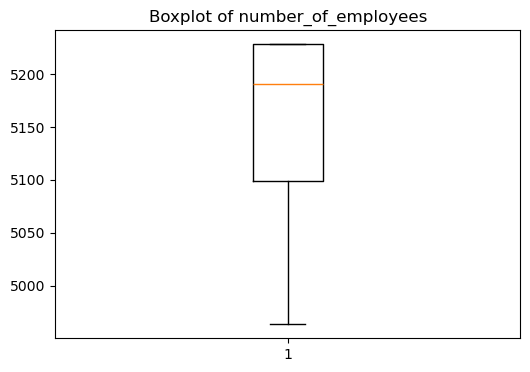

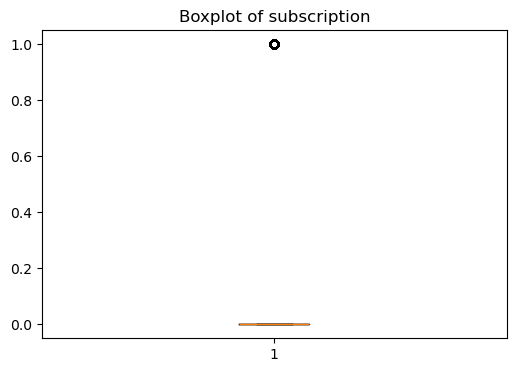

In [171]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.show()

In [172]:
# Remove Outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

In [173]:
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [174]:
df = df[(df[col] >= lower) & (df[col] <= upper)]
df.shape

(36532, 21)

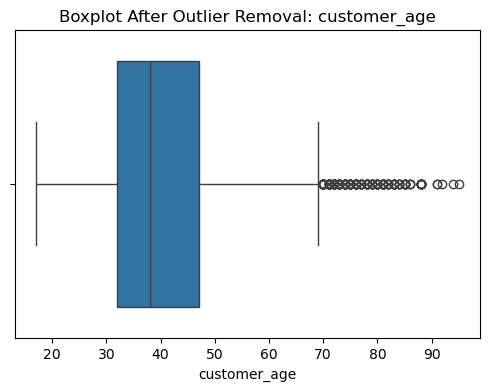

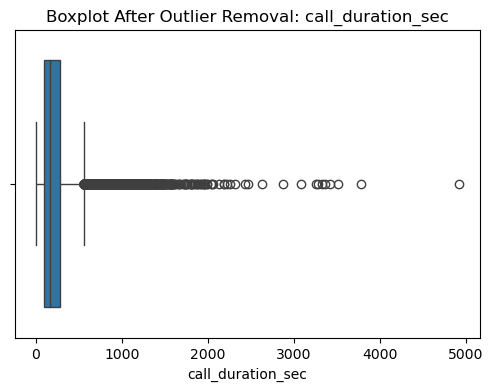

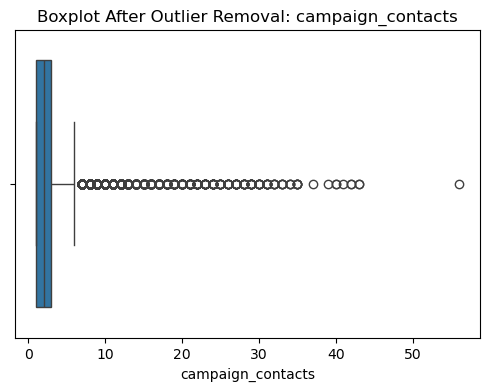

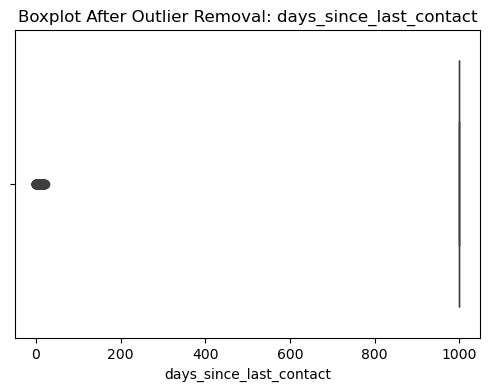

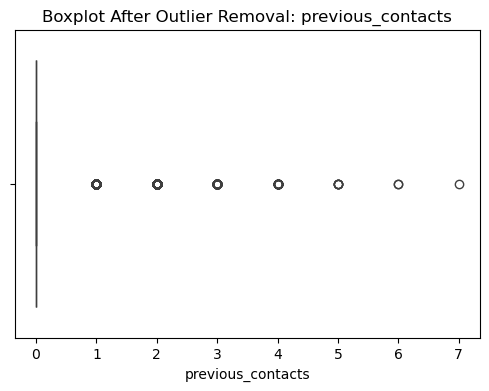

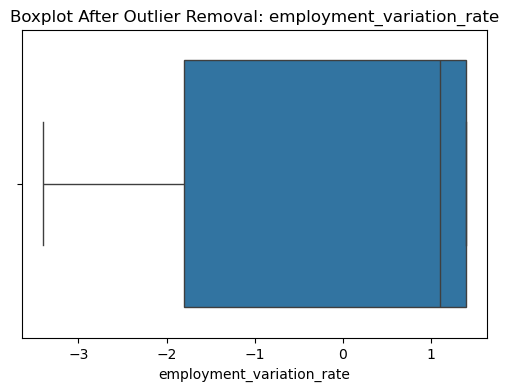

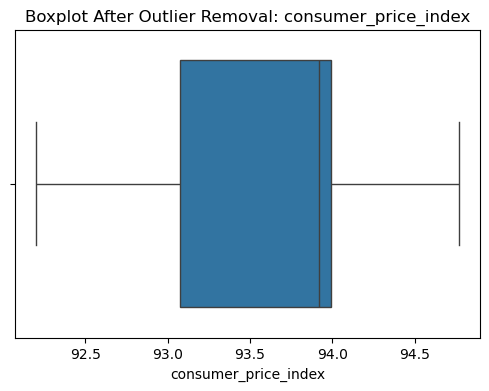

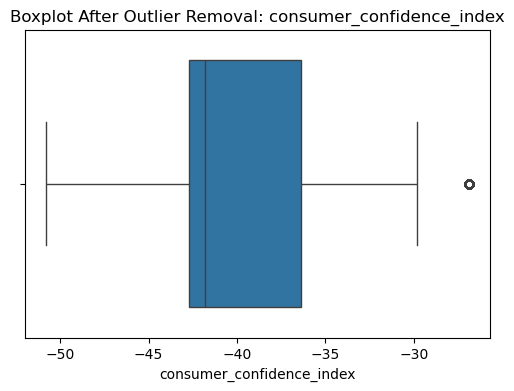

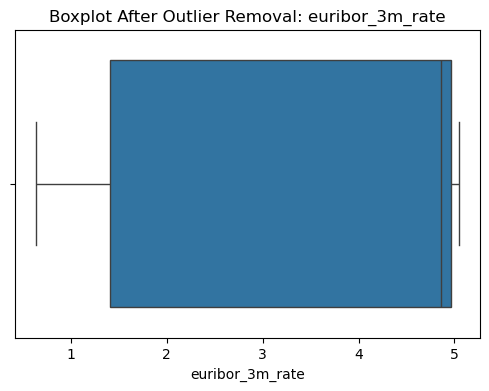

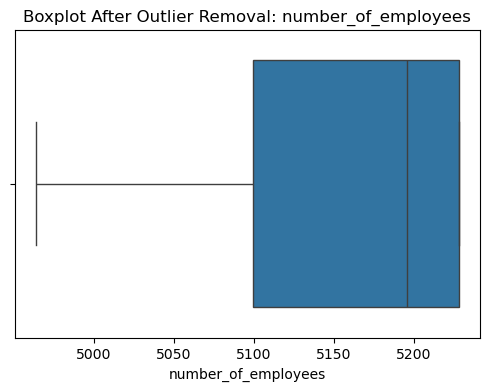

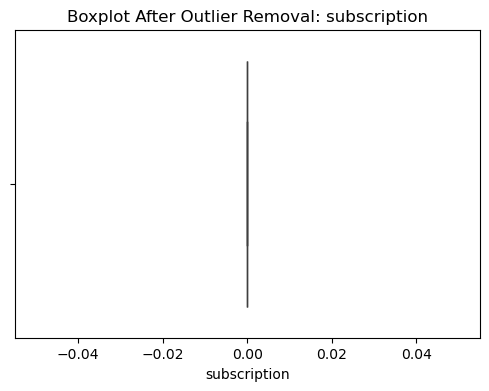

In [175]:
for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot After Outlier Removal: {col}")
    plt.show()

* Extreme values removed

* Dataset size reduces

In [176]:
# Check Skewness
df[num_cols].skew()

KeyError: 11

In [ ]:
# Remove skewness
for col in num_cols:
    df[col] = np.log1p(df[col])

c:\Users\sahun\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Recheck skewness
df[num_cols].skew()

age               0.141276
campaign          1.350265
pdays            -5.005207
previous          2.586511
emp.var.rate     -2.021241
cons.price.idx   -0.241135
cons.conf.idx          NaN
euribor3m        -0.790738
nr.employed      -1.063718
dtype: float64

In [ ]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Separate features & target
X = df.drop('y_yes', axis=1)
y = df['y_yes']

In [ ]:
# Check class imbalance
y.value_counts()

y_yes
False    36537
True      4639
Name: count, dtype: int64

In [ ]:
# Check class imbalance
y.value_counts(normalize=True) * 100

y_yes
False    88.733728
True     11.266272
Name: proportion, dtype: float64

In [ ]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# Check class imbalance
y_train.value_counts(normalize=True)*100

y_yes
False    50.0
True     50.0
Name: proportion, dtype: float64

In [ ]:
# Feature Scaling (Only Numeric Columns)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Makes features same scale

* Important for Logistic Regression, KNN, SVM

In [ ]:
# Apply SMOTE (only on training data)
sm = SMOTE(random_state=42)

X_train, y_train = sm.fit_resample(X_train, y_train)

print("After Balancing:")
print(pd.Series(y_train).value_counts())

After Balancing:
y_yes
False    29229
True     29229
Name: count, dtype: int64


What happens here?

* SMOTE creates synthetic minority samples to balance classes.

# Model Building

Logistic Regression